## 1. Problem Definition

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the [Cardiovascular Disease dataset-Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset).

We use the independent variables to predict our dependent variable.

## 3. Evaluation

If we can reach 80% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

## 4. Features

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - int (days) 
2. height - int (cm)  
3. weight - float (kg)
4. gender - categorical code
    * 1: female
    * 2: male
5. ap_hi - int (mg/dl) - Systolic blood pressure
6. ap_lo - int (mg/dl) - Diastolic blood pressure
7. cholesterol
    * 1: normal
    * 2: above normal
    * 3: well above normal
8. gluc - Glucose
    * 1: normal
    * 2: above normal
    * 3: well above normal
9. smoke - binary
    * 0: no
    * 1: yes
10. alco - binary - Alcohol intake 
    * 0: no
    * 1: yes
11. active - binary - Physical activity
    * 0: no
    * 1: yes
12. cardio - binary - Presence or absence of cardiovascular disease
    * 0: no
    * 1: yes

## Preparing the tools

In [2]:
# preparing the tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# other possible models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve

## Step 1: Load Data

In [3]:
df = pd.read_csv("cardio_train.csv", sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# drop id
df.drop("id", axis=1, inplace=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Step 2: Data Exploration (exploratory data analysis)

In [5]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


### Check whether the data is balanced

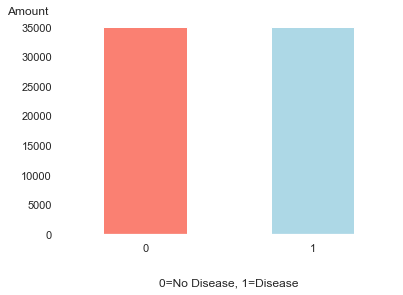

In [486]:
ax = df["cardio"].value_counts().plot(kind="bar",
                                 color=["salmon","lightblue"],);

# ax.set_facecolor("white")
ax.xaxis.set_label_coords(0.5, -0.2)
ax.yaxis.set_label_coords(-0.1, 1)
plt.xticks(rotation=0)
plt.xlabel("0=No Disease, 1=Disease")
plt.ylabel("Amount",rotation=0);

### Heart Disease Frequency according to Sex

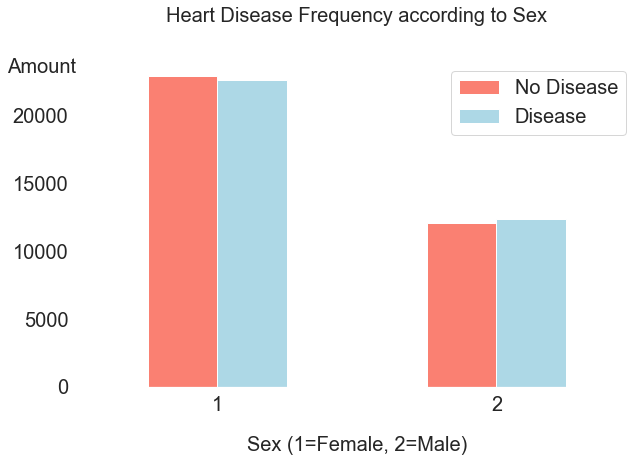

In [487]:
ax = pd.crosstab(df["gender"], df["cardio"]).plot(kind="bar",
                                                  figsize=(10,6),
                                                  color=["salmon","lightblue"],fontsize=20);


ax.xaxis.set_label_coords(0.5, -0.15)
ax.yaxis.set_label_coords(-0.065, 0.95)
# ax.set_title_coords(-0.065, 0.95)

plt.xticks(rotation=0)
# ax.set_facecolor("white")
plt.xlabel("Sex (1=Female, 2=Male)",fontsize=20)
plt.ylabel("Amount",fontsize=20,rotation=0)
plt.title("Heart Disease Frequency according to Sex",fontsize=20,x=0.5, y=1.1)
ax.legend(["No Disease","Disease"],fontsize=20);

### Check if there is any null or duplicated row

In [488]:
print("There is {} duplicated values in data frame".format(df.duplicated().sum()))

There is 24 duplicated values in data frame


In [489]:
df.duplicated().sum()

24

* We should delete 24 duplicated row

In [490]:
# Drop duplicated row
df.drop_duplicates(inplace=True)
print("There is {} duplicated values in data frame".format(df.duplicated().sum()))

There is 0 duplicated values in data frame


In [491]:
print("There is {} missing values in data frame".format(df.isnull().sum().sum()))

There is 0 missing values in data frame


* Now, there isn't any duplicated or missing row

### Detecting Outliers

In [492]:
df_copy = df.copy(deep=True)
df_copy.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


* find outliers in "height", "weight", "ap_hi", "ap_lo"
* standardize them first and compare together

In [493]:
std_list = ["height", "weight", "ap_hi", "ap_lo"]
def standartization(x):
    df_std = df_copy.copy(deep=True)
    for column in std_list:
        df_std[column] = (df_std[column]-df_std[column].mean())/df_std[column].std()
    return df_std 
df_std=standartization(df_copy)
df_std.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,0.443399,-0.847978,-0.122181,-0.088254,1,1,0,0,1,0
1,20228,1,-1.018016,0.749554,0.072577,-0.035205,3,1,0,0,1,1
2,18857,1,0.078045,-0.709062,0.007658,-0.141303,3,1,0,0,0,1
3,17623,2,0.565184,0.541180,0.137496,0.017844,1,1,0,0,1,1
4,17474,1,-1.018016,-1.264725,-0.187100,-0.194352,1,1,0,0,0,0


* melt the data to draw plot

In [495]:
df_melted = pd.melt(frame=df_std, 
                   value_vars=std_list, 
                   var_name="features", 
                   value_name="value", 
                   col_level=None)
df_melted

,features,value
0,height,0.443399
1,height,-1.018016
2,height,0.078045
3,height,0.565184
4,height,-1.018016
...,...,...
279899,ap_lo,-0.088254
279900,ap_lo,-0.035205
279901,ap_lo,-0.035205
279902,ap_lo,-0.088254


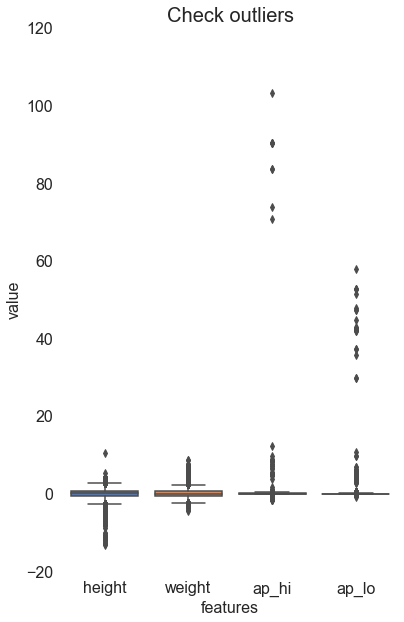

In [496]:
# Draw boxplot
plt.figure(figsize=(6,10))
ax = sns.boxplot(data=df_melted, x="features", y="value").set_title('Check outliers', fontsize=20)
plt.xlabel("features",fontsize=16)
plt.ylabel("value",fontsize=16)
plt.ylim(-20,120)
plt.yticks(fontsize=16);
plt.xticks(rotation=0,fontsize=16);

* There is unusual outlier from "ap_hi" and "ap_lo"

In [497]:
df_melted

,features,value
0,height,0.443399
1,height,-1.018016
2,height,0.078045
3,height,0.565184
4,height,-1.018016
...,...,...
279899,ap_lo,-0.088254
279900,ap_lo,-0.035205
279901,ap_lo,-0.035205
279902,ap_lo,-0.088254


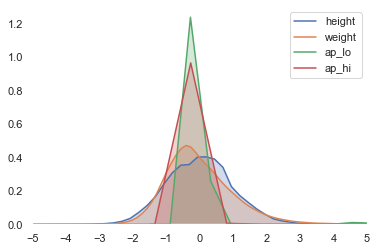

In [498]:
import matplotlib.ticker as ticker

ax = sns.kdeplot(data=df_melted[df_melted["features"]=="height"]["value"], shade=True, bw=.2);
ax = sns.kdeplot(data=df_melted[df_melted["features"]=="weight"]["value"], shade=True, bw=.2);
ax = sns.kdeplot(data=df_melted[df_melted["features"]=="ap_lo"]["value"], shade=True, bw=.2);
ax = sns.kdeplot(data=df_melted[df_melted["features"]=="ap_hi"]["value"], shade=True, bw=.2);

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend( labels=["height", "weight","ap_lo","ap_hi"])
plt.xlim(-5,5);

In [499]:
# drop "ap_hi" outlier
df_copy["ap_hi_zscore"] = np.abs((df_copy["ap_hi"]-df["ap_hi"].mean())/df_copy["ap_hi"].std())
df_copy.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_hi_zscore
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.122181
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0.072577
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.007658
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0.137496
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.187100


In [500]:
# drop "ap_lo" outlier
df_copy["ap_lo_zscore"] = np.abs((df_copy["ap_lo"]-df_copy["ap_lo"].mean())/df_copy["ap_lo"].std())
df_copy.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_hi_zscore,ap_lo_zscore
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.122181,0.088254
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0.072577,0.035205
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.007658,0.141303
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0.137496,0.017844
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.187100,0.194352


In [501]:
df_no_outlier = df_copy[(df_copy["ap_hi_zscore"]<3)]
df_no_outlier = df_no_outlier[(df_copy["ap_lo_zscore"]<3)]
df_no_outlier

/Users/michaelyu103/opt/anaconda3/envs/TensorFlow_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_hi_zscore,ap_lo_zscore
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.122181,0.088254
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0.072577,0.035205
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.007658,0.141303
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0.137496,0.017844
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.187100,0.194352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,0.057262,0.088254
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,0.072577,0.035205
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,0.332253,0.035205
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,0.040117,0.088254


In [502]:
df_no_outlier[df_no_outlier["ap_lo_zscore"]>3]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_hi_zscore,ap_lo_zscore


In [503]:
df_no_outlier.drop("ap_hi_zscore", axis=1, inplace=True)
df_no_outlier.drop("ap_lo_zscore", axis=1, inplace=True)
df_no_outlier

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### Correlation Matrix

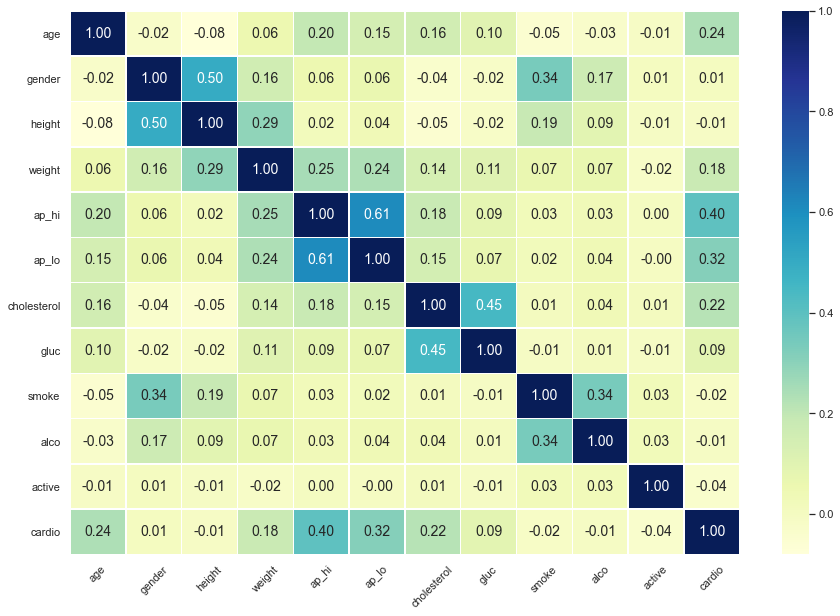

In [504]:
corr_matrix = df_no_outlier.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 annot_kws={"size": 14},
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
sns.set(font_scale=1.4)
plt.xticks(rotation=45);

## Step 3: Modelling

In [505]:
# split data to x and y
x = df_no_outlier.drop("cardio",axis=1)
y = df_no_outlier["cardio"]

In [506]:
# split data into train and test sets
np.random.seed(42)

# split into train & test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

### 3 models we're going to try
1. Logistics Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
4. XGBClassifier

In [507]:
dict_test = {"Name":["a","b","c"], "Acc":[0.8,0.5,0.7], "Time":[12,23,20]}
df = pd.DataFrame(data=dict_test)
df

,Name,Acc,Time
0,a,0.8,12
1,b,0.5,23
2,c,0.7,20


In [607]:
import time
from sklearn.svm import LinearSVC
# put 3 models in dict
models = {"LinearSVC":LinearSVC(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier(),
          "XGBoost" : XGBClassifier(),
          "AdaBoost" : AdaBoostClassifier(),
          "CatBoost": CatBoostClassifier(),
          "lightgbm": LGBMClassifier()}

# create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # set random seed
    np.random.seed(42)
    # make a dict to keep the model score
    names = []
    results = []
    times = []
    # loop through models
    for name, model in models.items():
        # collect start time
        tStart = time.time()
        # fit the model to the data
        model.fit(x_train, y_train)
        # collect end time
        tEnd = time.time()
        # Evaluate the model and append its score to model_score
        names.append(name)
        results.append(model.score(x_test, y_test))
        times.append(tEnd-tStart)

    return names,results,times

In [608]:
model_test = fit_and_score(models=models,
              x_train=x_train,
              x_test=x_test,
              y_train=y_train,
              y_test=y_test)

model_test

/Users/michaelyu103/opt/anaconda3/envs/TensorFlow_env/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Learning rate set to 0.057109
0:	learn: 0.6771534	total: 22.8ms	remaining: 22.8s
1:	learn: 0.6625632	total: 43.2ms	remaining: 21.5s
2:	learn: 0.6497642	total: 63.4ms	remaining: 21.1s
3:	learn: 0.6387342	total: 80.1ms	remaining: 19.9s
4:	learn: 0.6291765	total: 97.2ms	remaining: 19.3s
5:	learn: 0.6204748	total: 114ms	remaining: 18.9s
6:	learn: 0.6127979	total: 131ms	remaining: 18.6s
7:	learn: 0.6055690	total: 147ms	remaining: 18.3s
8:	learn: 0.5995244	total: 167ms	remaining: 18.4s
9:	learn: 0.5941637	total: 188ms	remaining: 18.6s
10:	learn: 0.5891230	total: 217ms	remaining: 19.5s
11:	learn: 0.5848084	total: 251ms	remaining: 20.7s
12:	learn: 0.5808553	total: 271ms	remaining: 20.6s
13:	learn: 0.5774348	total: 294ms	remaining: 20.7s
14:	learn: 0.5743948	total: 314ms	remaining: 20.6s
15:	learn: 0.5715164	total: 330ms	remaining: 20.3s
16:	learn: 0.5690311	total: 345ms	remaining: 20s
17:	learn: 0.5668274	total: 366ms	remaining: 19.9s
18:	learn: 0.5650245	total: 388ms	remaining: 20s
19:	learn:

(['LinearSVC',
  'KNN',
  'Random Forest',
  'XGBoost',
  'AdaBoost',
  'CatBoost',
  'lightgbm'],
 [0.5224670242064067,
  0.6819828960718944,
  0.7206116828525874,
  0.7381504565879113,
  0.7328598347586607,
  0.7417016958979562,
  0.7420640672561241],
 [13.263439893722534,
  0.12254810333251953,
  7.7312610149383545,
  3.272686004638672,
  1.622865915298462,
  22.279485940933228,
  0.456636905670166])

In [610]:
df_result = pd.DataFrame(list(model_test),index=['model', 'accuracy', 'time'])
print(df_result)

                  0         1              2        3         4         5  \
model     LinearSVC       KNN  Random Forest  XGBoost  AdaBoost  CatBoost   
accuracy   0.522467  0.681983       0.720612  0.73815   0.73286  0.741702   
time        13.2634  0.122548        7.73126  3.27269   1.62287   22.2795   

                 6  
model     lightgbm  
accuracy  0.742064  
time      0.456637  


In [612]:
df_result = df_result.T
df_result

,model,accuracy,time
0,LinearSVC,0.522467,13.2634
1,KNN,0.681983,0.122548
2,Random Forest,0.720612,7.73126
3,XGBoost,0.73815,3.27269
4,AdaBoost,0.73286,1.62287
5,CatBoost,0.741702,22.2795
6,lightgbm,0.742064,0.456637


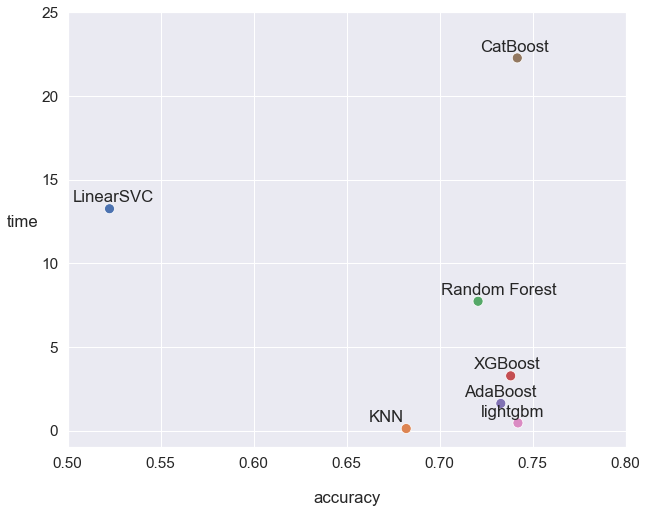

In [616]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(x="accuracy", 
                     y="time", 
                     hue="model",
                     legend=False,
                     data=df_result,s=100)
plt.xlim(0.5,0.8)
plt.ylim(-1,25)
plt.ylabel("time",rotation=0)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.08, 0.5)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']-0.02, point['y']+0.4, str(point['val']))

label_point(df_result.accuracy, df_result.time, df_result.model, plt.gca())

In [623]:
import time
from sklearn.svm import LinearSVC
# put 3 models in dict
models = {"LinearSVC":LinearSVC(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier(),
          "XGBoost" : XGBClassifier(),
          "AdaBoost" : AdaBoostClassifier(),
          "CatBoost": CatBoostClassifier(),
          "lightgbm": LGBMClassifier()}

# create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # set random seed
    np.random.seed(42)
    # make a dict to keep the model score
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(x_train, y_train)
       # Evaluate the model and append its score to model_score
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [624]:
model_scores = fit_and_score(models=models,
              x_train=x_train,
              x_test=x_test,
              y_train=y_train,
              y_test=y_test)

model_scores

/Users/michaelyu103/opt/anaconda3/envs/TensorFlow_env/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Learning rate set to 0.057109
0:	learn: 0.6771534	total: 24.3ms	remaining: 24.2s
1:	learn: 0.6625632	total: 48.5ms	remaining: 24.2s
2:	learn: 0.6497642	total: 69.7ms	remaining: 23.2s
3:	learn: 0.6387342	total: 87.9ms	remaining: 21.9s
4:	learn: 0.6291765	total: 106ms	remaining: 21.2s
5:	learn: 0.6204748	total: 122ms	remaining: 20.3s
6:	learn: 0.6127979	total: 140ms	remaining: 19.9s
7:	learn: 0.6055690	total: 156ms	remaining: 19.4s
8:	learn: 0.5995244	total: 177ms	remaining: 19.5s
9:	learn: 0.5941637	total: 204ms	remaining: 20.2s
10:	learn: 0.5891230	total: 238ms	remaining: 21.4s
11:	learn: 0.5848084	total: 263ms	remaining: 21.7s
12:	learn: 0.5808553	total: 285ms	remaining: 21.6s
13:	learn: 0.5774348	total: 304ms	remaining: 21.4s
14:	learn: 0.5743948	total: 325ms	remaining: 21.3s
15:	learn: 0.5715164	total: 342ms	remaining: 21s
16:	learn: 0.5690311	total: 358ms	remaining: 20.7s
17:	learn: 0.5668274	total: 379ms	remaining: 20.7s
18:	learn: 0.5650245	total: 402ms	remaining: 20.7s
19:	learn

{'LinearSVC': 0.5224670242064067,
 'KNN': 0.6819828960718944,
 'Random Forest': 0.7206116828525874,
 'XGBoost': 0.7381504565879113,
 'AdaBoost': 0.7328598347586607,
 'CatBoost': 0.7417016958979562,
 'lightgbm': 0.7420640672561241}

## Step 4: Evaluation (Model Comparison)

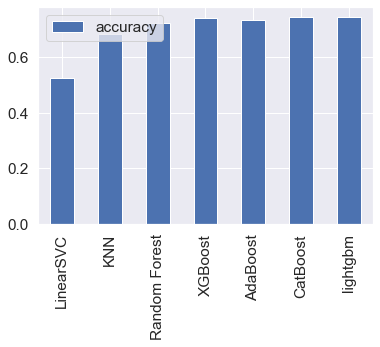

In [625]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [626]:
model_compare

,LinearSVC,KNN,Random Forest,XGBoost,AdaBoost,CatBoost,lightgbm
accuracy,0.522467,0.681983,0.720612,0.73815,0.73286,0.741702,0.742064


In [627]:
x = model_compare.T.sort_values(by='accuracy', ascending=True)

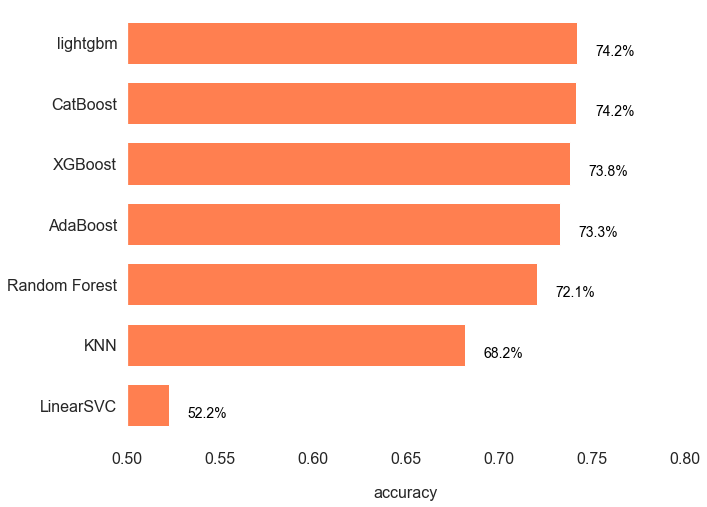

In [671]:
ax = x.plot(kind='barh', figsize=(10,8),color="coral", fontsize=13, legend=None, width=0.7);
ax.set_alpha(0.8)
# ax.set_title("Evaluate Models", fontsize=20)
ax.set_xlabel("accuracy", fontsize=16);
ax.set_facecolor("white")
plt.xlim(0.5,0.8);
plt.grid(False)
plt.yticks(fontsize=16);
plt.xticks(fontsize=16);
ax.xaxis.set_label_coords(0.5, -0.1)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.01, i.get_y()+0.15,
            str(round((i.get_width())*100, 1))+'%', fontsize=14,
color='black')

# invert for largest on top 
# ax.invert_yaxis()

### Hyperparameter tuning with RandomizedSearchCV
CV stands for cross-validation

* XGBoost

In [326]:
# Different XGBoost hyperparameters
XGB_grid = {'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [3, 4, 5]}


In [327]:

np.random.seed(42)

#Setup grid hyperparameter search for XGBClassifier
rs_XGB = RandomizedSearchCV(XGBClassifier(),
                          param_distributions=XGB_grid,
                          cv=5,
                          n_iter = 20,
                          verbose=True)

# Fit grid hyperparameter search model
rs_XGB.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.8min finished


In [328]:
# Evaluate the model
rs_XGB.score(x_test, y_test)

0.7431511813306276

In [329]:
rs_XGB.best_params_

{'subsample': 1.0,
 'min_child_weight': 1,
 'max_depth': 3,
 'gamma': 0.5,
 'colsample_bytree': 0.8}

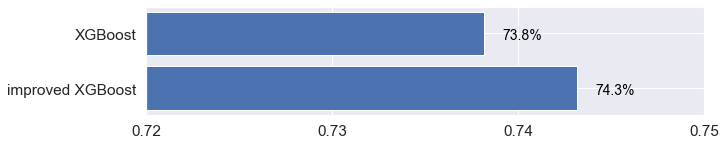

In [357]:
score_value = [rs_XGB.score(x_test, y_test),model_scores['XGBoost']]
score_index = ["improved XGBoost","XGBoost"]
fig, ax = plt.subplots(figsize=(10,2))
ax.barh(score_index,score_value)
# plt.text(score_value, score_index, str(score_value), fontsize=12)
plt.xlim(0.72,0.75)
plt.xticks([0.72,0.73,0.74,0.75])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.001, i.get_y()+0.3,
            str(round((i.get_width())*100, 1))+'%', fontsize=14,
color='black')

In [336]:
# Tune AdaBoost hyperparameters
Ada_grid = {'learning_rate' : [0.01,0.05,0.1,0.3,1],
            'n_estimators': [10, 50, 100,200,420]}


In [337]:
np.random.seed(42)

#Setup grid hyperparameter search for AdaBoost
rs_Ada = RandomizedSearchCV(AdaBoostClassifier(),
                          param_distributions=Ada_grid,
                          cv=5,
                          n_iter = 20,
                          verbose=True)

# Fit grid hyperparameter search model
rs_Ada.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.3min finished


In [338]:
# Evaluate the model
rs_Ada.score(x_test, y_test)

0.7324249891288592

In [339]:
rs_Ada.best_params_

{'n_estimators': 100, 'learning_rate': 1}

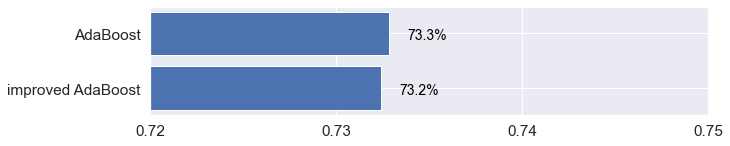

In [358]:
import matplotlib.ticker as ticker
score_value = [rs_Ada.score(x_test, y_test),model_scores['AdaBoost']]
score_index = ["improved AdaBoost","AdaBoost"]
fig, ax = plt.subplots(figsize=(10,2))
ax.barh(score_index,score_value)
# plt.text(score_value, score_index, str(score_value), fontsize=12)
plt.xlim(0.72,0.75)
plt.xticks([0.72,0.73,0.74,0.75])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.001, i.get_y()+0.3,
            str(round((i.get_width())*100, 1))+'%', fontsize=14,color='black')

In [676]:
# Tune lightgbm hyperparameters
gbm_grid = {
#             'learning_rate': [0.05],
#     'num_leaves': [90,200],
#     'boosting_type' : ['gbdt'],
#     'objective' : ['binary'],
#     'max_depth' : [5,6,7,8],
#     'random_state' : [501], 
#     'colsample_bytree' : [0.5,0.7],
#     'subsample' : [0.5,0.7],
#     'min_split_gain' : [0.01],
#     'min_data_in_leaf':[10],
#     'metric':['auc']
'max_depth': [15, 20, 25, 30, 35],
              'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
              'feature_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
              'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
              'bagging_freq': [2, 4, 5, 6, 8],
              'lambda_l1': [0, 0.1, 0.4, 0.5, 0.6],
              'lambda_l2': [0, 10, 15, 35, 40],
              'cat_smooth': [1, 10, 15, 20, 35]
}
gbm = LGBMClassifier()


In [677]:
np.random.seed(42)

#Setup grid hyperparameter search for lightgbm
rs_gbm = RandomizedSearchCV(gbm,
                          param_distributions=gbm_grid,
                          cv=5,
                          n_iter = 20,
                          verbose=True)

# Fit grid hyperparameter search model
rs_gbm.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


In [678]:
# Evaluate the model
rs_gbm.score(x_test, y_test)

0.7431511813306276

In [661]:
rs_gbm.best_params_

{'reg_lambda ': 8,
 'reg_alpha ': 0.001,
 'objective ': 'b',
 'num_leaves ': 40,
 'num_iterations ': 200,
 'min_child_samples': 21,
 'learning_rate ': 0.1,
 'feature_fraction ': 0.7,
 'cat_smooth ': 0,
 ' min_child_weight': 0.001,
 ' max_depth ': 6,
 ' bagging_freq ': 2,
 ' bagging_fraction ': 1}

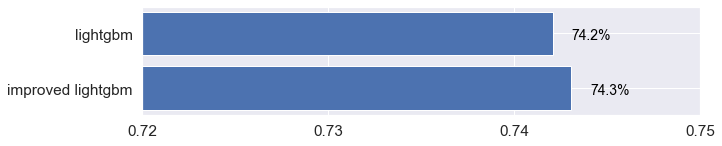

In [662]:
import matplotlib.ticker as ticker
score_value = [rs_gbm.score(x_test, y_test),model_scores['lightgbm']]
score_index = ["improved lightgbm","lightgbm"]
fig, ax = plt.subplots(figsize=(10,2))
ax.barh(score_index,score_value)
# plt.text(score_value, score_index, str(score_value), fontsize=12)
plt.xlim(0.72,0.75)
plt.xticks([0.72,0.73,0.74,0.75])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.001, i.get_y()+0.3,
            str(round((i.get_width())*100, 1))+'%', fontsize=14,color='black')

### Evaluating a classification model, beyond accuracy

* ROC curve and AUC score - [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)
* Confusion matrix - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Classification report - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Precision - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1-score - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)


In [74]:
# Make preidctions on test data
y_preds = rs_XGB.predict(x_test)

### ROC Curve and AUC Scores

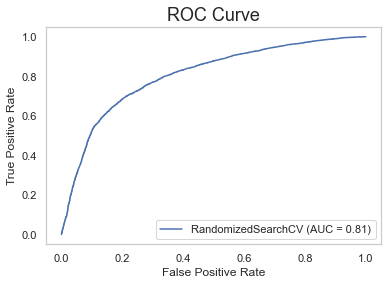

In [936]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_XGB, x_test, y_test)
plt.title("ROC Curve", fontsize=18)
plt.grid(False);

### Confusion matrix

In [76]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[5502 1497]
 [2047 4752]]


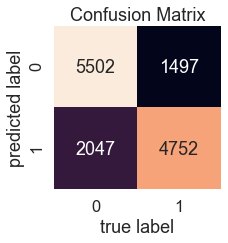

In [81]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False,
                     fmt='g')
    
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.title("Confusion Matrix")
plot_conf_mat(y_test, y_preds)

### Classification report

In [665]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      6999
           1       0.76      0.70      0.73      6799

    accuracy                           0.74     13798
   macro avg       0.74      0.74      0.74     13798
weighted avg       0.74      0.74      0.74     13798



### make them more solid is calculate them using cross-validation

In [666]:
# Check best hyperparameters
rs_XGB.best_params_

{'subsample': 1.0,
 'min_child_weight': 1,
 'max_depth': 3,
 'gamma': 0.5,
 'colsample_bytree': 0.8}

In [26]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = XGBClassifier(subsample=1.0,
                    min_child_weight=1,
                    max_depth=3,
                    gamma=0.5,
                    colsample_bytree=0.8)

In [669]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.73141035, 0.7414118 , 0.73429006, 0.73378271, 0.73276799])

In [670]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7347325821244017

In [671]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       x,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.7557718728975317

In [672]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    x,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.6856347927954312

In [673]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                x,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.7189889493492572

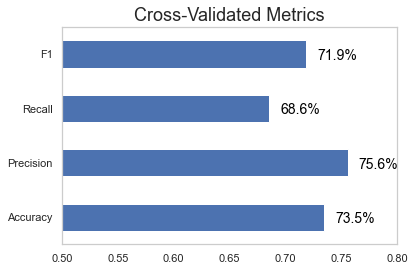

In [946]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
ax = cv_metrics.T.plot.barh(legend=False)
plt.title("Cross-Validated Metrics",fontsize=18)
plt.xlim(0.5,0.8);
plt.grid(False);
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.01, i.get_y()+0.15,
            str(round((i.get_width())*100, 1))+'%', fontsize=14,
color='black')


### Feature importance
calculate feature importance for XGBoost

In [682]:
clf = LGBMClassifier(reg_lambda = 8,
                         reg_alpha = 0.001,
#                          objective = 'b',
                         num_leaves = 40,
                         num_iterations = 200,
                         min_child_samples= 21,
                         learning_rate = 0.1,
                         feature_fraction = 0.7,
                         cat_smooth = 0,
                         min_child_weight= 0.001,
                         max_depth = 6,
                         bagging_freq = 2,
                         bagging_fraction = 1)

In [683]:
clf_GBM = clf.fit(x_train, y_train)

<Figure size 720x2880 with 0 Axes>

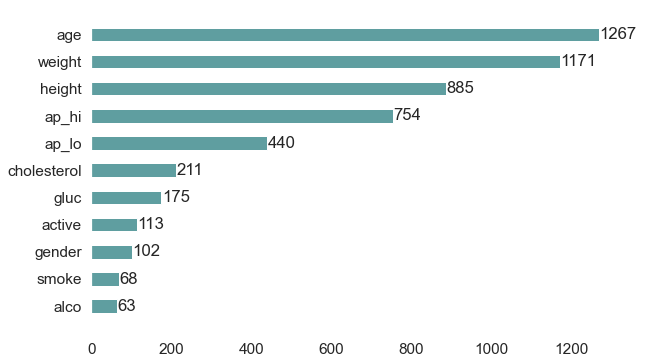

In [718]:
import lightgbm as lgb
plt.figure(figsize=(10,40))
ax = lgb.plot_importance(clf_GBM, figsize=(10,6), xlabel=None, ylabel=None, title=None, grid=None, height=0.5, color="cadetblue")
ax.set_facecolor("white")
plt.show();

###### Step 5: Save Best Model 

In [725]:
from sklearn.externals import joblib 

# Save the model as a pickle in a file 
joblib.dump(clf_GBM,'LightGBM.pkl') 

['LightGBM.pkl']